<a href="https://colab.research.google.com/github/RitikNimade/Project/blob/main/Spam_SMS_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/spam.csv', encoding = 'ISO-8859-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df =df.rename(columns ={
    'v1':'target',
    'v2':'sms'
})

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df

,target,sms,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df['target']= df['target'].replace({'ham':0, 'spam':1})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   target      5572 non-null   int64 
 1   sms         5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: int64(1), object(4)
memory usage: 217.8+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

In [ ]:
df['target']= Le.fit_transform(df['target'])

In [ ]:
df.duplicated().sum()

403

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df[['target']].value_counts()

target
0         4516
1          653
Name: count, dtype: int64

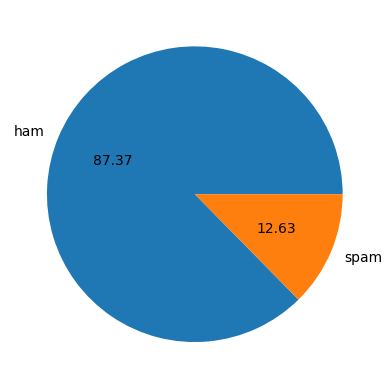

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct = '%0.2f')
plt.show()

In [ ]:
df['num_char']=df['sms'].apply(len)

In [ ]:
from nltk import word_tokenize,sent_tokenize

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['word']= df['sms'].apply(lambda x: len(word_tokenize(x)))

In [ ]:
df['sent']= df['sms'].apply(lambda x: len(sent_tokenize(x)))

In [ ]:
df.sample()

,target,sms,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_char,word,sent
574,0,Nope i waiting in sch 4 daddy...,NaN,NaN,NaN,33,8,1


In [ ]:

df.drop(columns = df[['Unnamed: 2','Unnamed: 3','Unnamed: 4']],inplace=True)

In [ ]:
df.sample()

,target,sms,num_char,word,sent
4052,0,I was slept that time.you there?,32,7,1


In [ ]:
import seaborn as sns


<Axes: xlabel='num_char', ylabel='Count'>

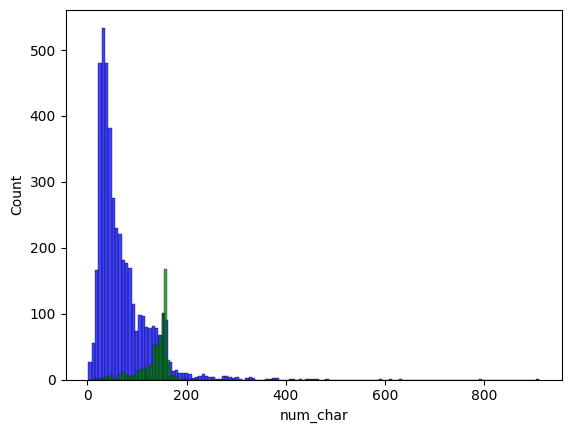

In [ ]:
sns.histplot(df[df['target']==0]['num_char'],color='blue')
sns.histplot(df[df['target']==1]['num_char'],color='green')


In [ ]:
df[['num_char','word','num_char']].describe()

,num_char,word,num_char
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,78.977945
std,58.236293,13.324758,58.236293
min,2.000000,1.000000,2.000000
25%,36.000000,9.000000,36.000000
50%,60.000000,15.000000,60.000000
75%,117.000000,26.000000,117.000000
max,910.000000,220.000000,910.000000


<Figure size 1000x600 with 0 Axes>

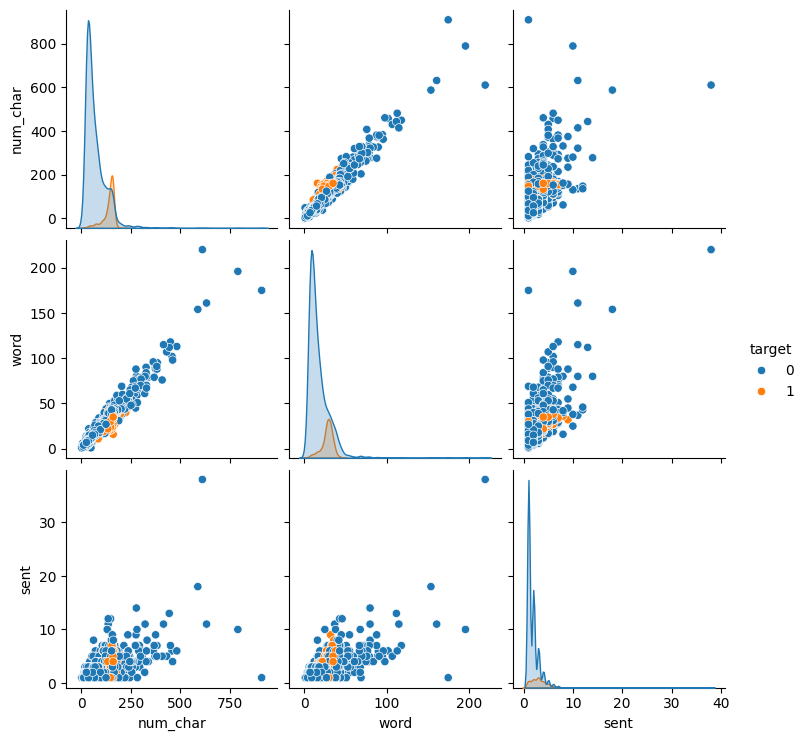

In [ ]:
plt.figure(figsize=(10,6))
sns.pairplot(df,hue='target')
plt.show()

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from nltk.corpus import stopwords
import string
string.punctuation
import nltk
nltk.download('stopwords')

def transform(sms):
  sms = sms.lower()
  sms = nltk.word_tokenize(sms)

  y=[]

  for i in sms:
    if i.isalnum():
      y.append(i)

  sms = y[:]
  y.clear()

  for i in sms:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  sms = y[:]
  y.clear()

  for i in sms:
    y.append(ps.stem(i))

  return " ".join(y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
transform('Hi , my NAme is # Ritik Nimade')

'hi name ritik nimad'

In [ ]:
df['text'] = df['sms'].apply(transform)

In [ ]:
df.sample()

,target,sms,num_char,word,sent,text
598,0,Will do. Was exhausted on train this morning. ...,87,20,4,exhaust train morn much wine pie sleep well


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
ham = wc.generate(df[df['target']==0]['text'].str.cat(sep=" "))

In [ ]:
spam = wc.generate(df[df['target']==1]['text'].str.cat(sep=" "))

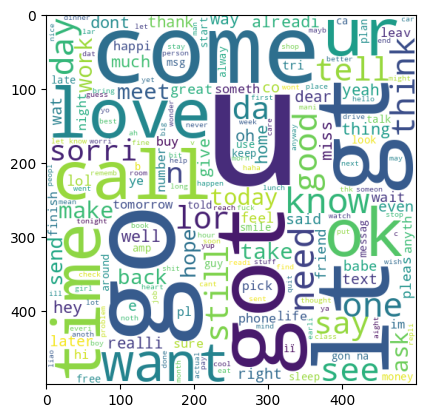

In [ ]:
plt.imshow(ham)

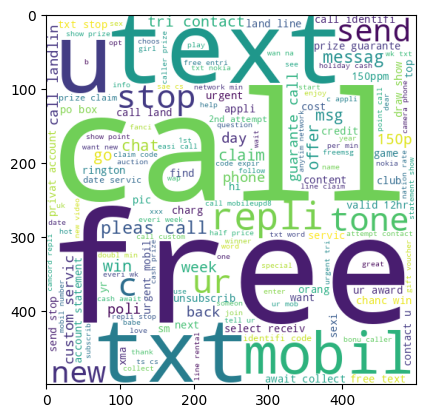

In [ ]:
plt.imshow(spam)

In [ ]:
spam_ = []
for sms in df[df['target']==1]['text'].tolist():
  for word in sms.split():
    spam_.append(word)


In [ ]:
len(spam_)


9939

In [ ]:
from collections import Counter
Counter(spam_).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [ ]:
ham_ = []
for sms in df[df['target']==0]['text'].tolist():
  for word in sms.split():
    ham_.append(word)

In [ ]:
len(ham_)

35404

In [ ]:
Counter(ham_).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer()

In [ ]:
X = tf.fit_transform(df['text']).toarray()
X.shape

(5169, 6708)

In [ ]:

y = df['target']

In [ ]:
y.shape

(5169,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
GB = GaussianNB()
MB = MultinomialNB()
BB = BernoulliNB()

In [ ]:
GB.fit(X_train,y_train)
pred=GB.predict(X_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(precision_score(y_test,pred))

0.8607350096711799
[[778 121]
 [ 23 112]]
0.48068669527896996


In [ ]:
MB.fit(X_train,y_train)
pred=MB.predict(X_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(precision_score(y_test,pred))

0.9526112185686654
[[899   0]
 [ 49  86]]
1.0


In [ ]:
BB.fit(X_train,y_train)
pred=BB.predict(X_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(precision_score(y_test,pred))

0.9535783365570599
[[894   5]
 [ 43  92]]
0.9484536082474226


In [ ]:
# going with MultinumialNB beacase it give o false positive which means our MB model does not predict any false positive value
# which means MB model not miss classify not spam mail is sapm
import pickle
pickle.dump(MB,open('model.pkl','wb'))
pickle.dump(tf,open('transform.pkl','wb'))